In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Student_Performance.csv")

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
df.describe(include = 'all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [13]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({"Yes" : 1, "No" : 0})

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


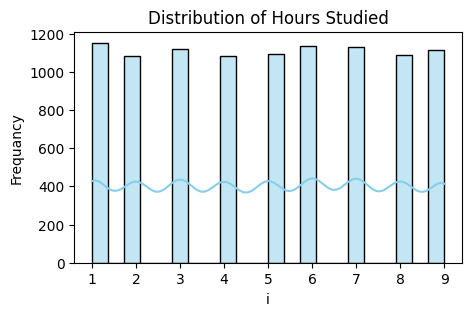

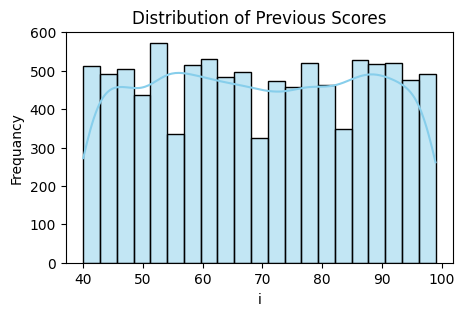

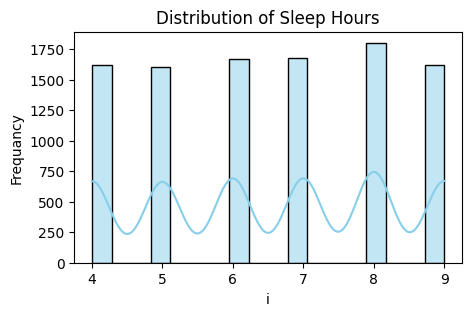

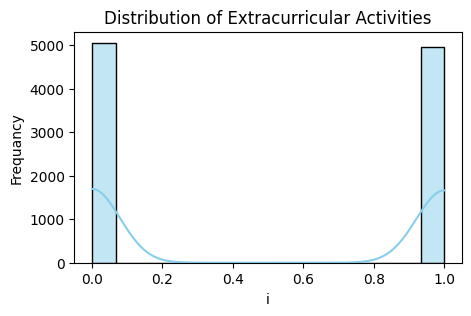

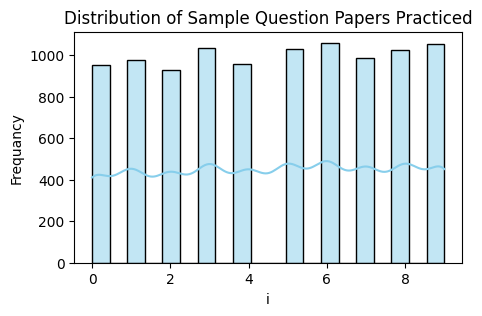

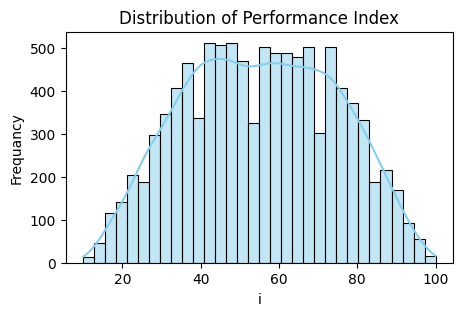

In [29]:
columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Extracurricular Activities', 'Sample Question Papers Practiced', 'Performance Index']
for i in columns:
  plt.figure(figsize=(5,3))
  sns.histplot(df[i], kde=True, color='skyblue')
  plt.title(f'Distribution of {i}')
  plt.xlabel('i')
  plt.ylabel("Frequancy")
  plt.show()

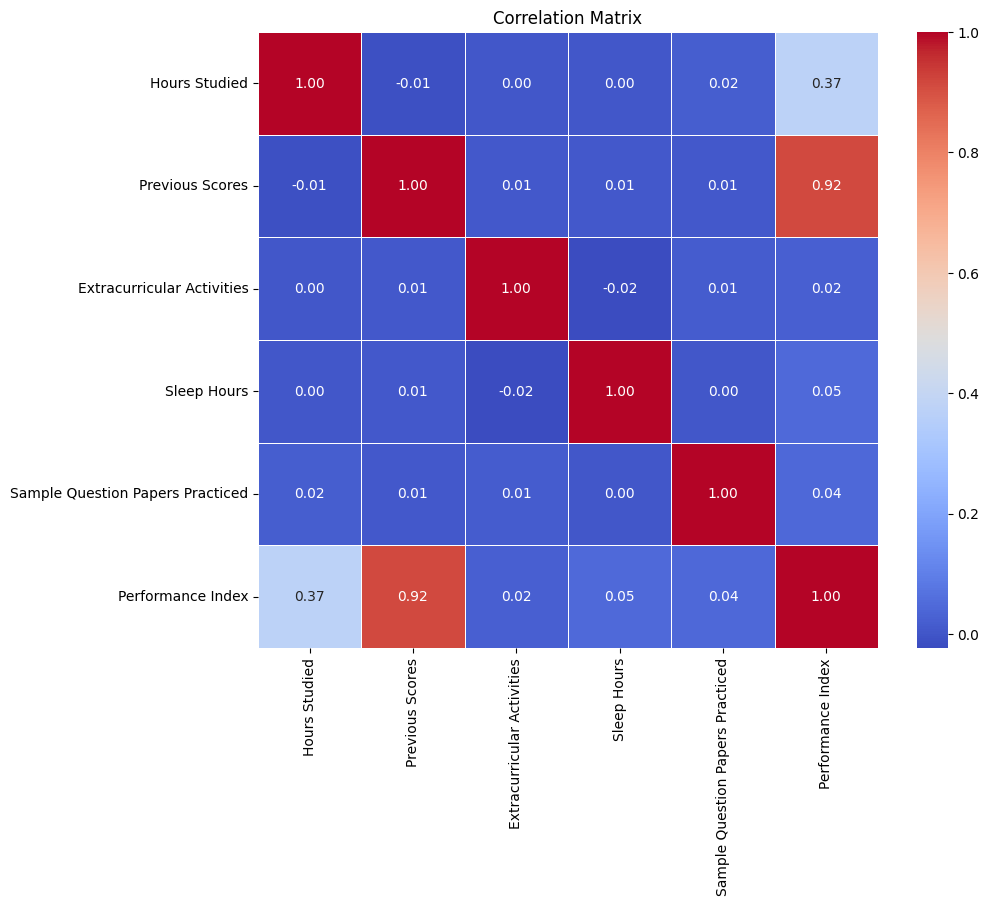

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

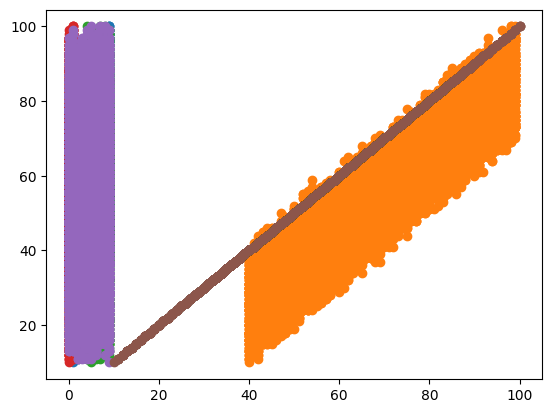

In [30]:
for i in columns:
  plt.scatter(df[i], df['Performance Index'])

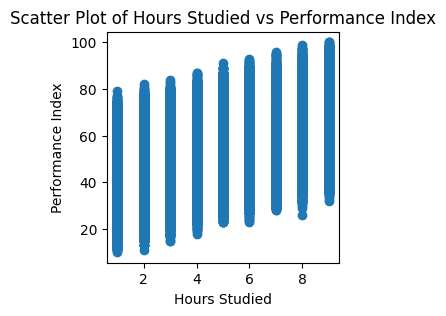

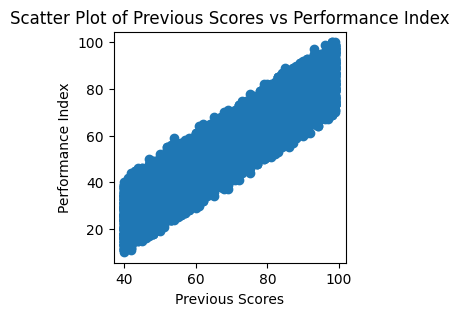

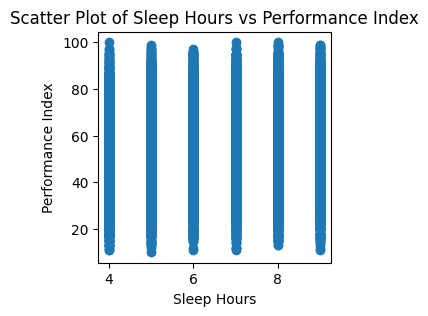

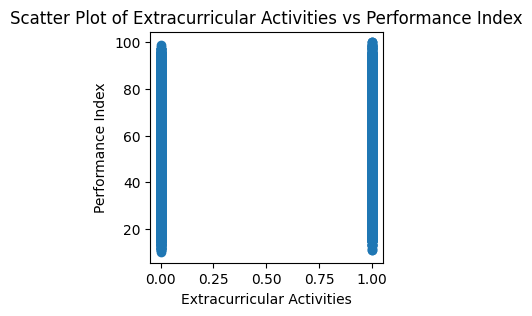

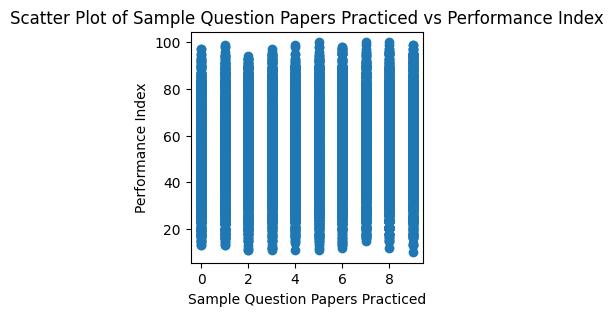

In [31]:
target_variable = 'Performance Index'
predictor_variables = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Extracurricular Activities', 'Sample Question Papers Practiced']

for predictor in predictor_variables:
    plt.figure(figsize=(3,3))
    plt.scatter(df[predictor], df[target_variable])
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.title(f"Scatter Plot of {predictor} vs {target_variable}")

plt.show()

In [33]:
feature_columns = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
target_variable = 'Performance Index'

X = df[feature_columns]
y = df[target_variable]

In [34]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [35]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [39]:
scaler  = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
pd.DataFrame(X, columns=feature_columns).head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [52]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7000, 5)
Shape of X_test: (3000, 5)
Shape of y_train: (7000,)
Shape of y_test: (3000,)


## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
lr_y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.0165722957763483


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
dt_y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, dt_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.9885553304168493


## Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
rf_y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, rf_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.293662663622092


## Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [73]:
gb_y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, gb_y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.0857531909896276
